In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Create the index
index_ = df['Id']*2
 
# Set the index
df.index = index_

In [8]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
4,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
6,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
8,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
10,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df.loc[100:300]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
100,50,20,RL,66.0,7742,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,127000
102,51,60,RL,NaN,13869,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,177000
104,52,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
106,53,90,RM,110.0,8472,Grvl,NaN,IR2,Bnk,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,110000
108,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,146,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,130000
294,147,30,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,105000
296,148,60,RL,NaN,9505,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,222500


In [10]:
df['HouseStyle'].iloc[:50].value_counts()

1Story    33
2Story    10
1.5Fin     3
1.5Unf     3
SFoyer     1
Name: HouseStyle, dtype: int64

In [11]:
new = df['MiscFeature'].isin(['Shed'])
df[new]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
12,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
16,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
34,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
36,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
104,52,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
170,85,80,RL,NaN,8530,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,5,2009,WD,Normal,168500
192,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
198,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000
200,100,20,RL,77.0,9320,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,400,1,2010,WD,Normal,128950


In [12]:
df['Street'][df['Street'] == 'Pave'].count()

1454

In [13]:
df['Street'][df['Street'] != 'Pave'].count()

6

In [14]:
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [15]:
df.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [16]:
df['SalePrice'].max()

755000

In [17]:
df['SalePrice'].sum()

264144946

In [18]:
df['SalePrice'].std()

79442.50288288662

In [19]:
np.std(df['SalePrice'])

79415.29188606751

In [31]:
df.notnull().sum()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [22]:
#count number of rows with missing values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [33]:
df.duplicated().sum()

0

In [38]:
top25 = 214000
bot25 = 129975
new_data  = df[(df['SalePrice'] <= bot25) | (df['SalePrice'] >= top25)]
new_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
6,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
10,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
14,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
18,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
20,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2898,1449,50,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,112000
2900,1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
2904,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090


In [39]:
df['sqfootPrice']=df['SalePrice']/df['LotArea']
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,sqfootPrice
Id,,,,,,,,,,,,,,,,,,,,,
2,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,24.674556
4,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,18.906250
6,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,19.866667
8,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,14.659686
10,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,17.531557


In [40]:
pd.pivot_table(df, values=['sqfootPrice', 'SalePrice'], index=['YrSold', 'SaleCondition'],
                       aggfunc={'sqfootPrice': ["min", "sum"],
                                'SalePrice': ["min", "max", "mean"]})

SalePrice                        sqfootPrice             
                           max           mean     min         min          sum
YrSold SaleCondition                                                          
2006   Abnorml          310000  142857.363636   35311    3.923444   618.166817
       AdjLand          127500  104250.000000   81000    9.631391    23.195221
       Alloca           274970  274970.000000  274970   13.964957    13.964957
       Family           188000  138500.000000  105000   10.086455   121.845267
       Normal           625000  175522.612335   52500    3.956982  4703.720064
       Partial          556581  259793.813953  140000   10.504268  1111.848447
2007   Abnorml          745000  198346.153846   67000    6.991870   226.652765
       AdjLand          126000  126000.000000  126000   15.441176    15.441176
       Alloca           359100  216398.333333   89471    6.141300    50.753725
       Family           259000  176142.857143  108000   11.631915   144.310918
       Normal           755000  175312.124528   39300    1.742138  5330.864843
       Partial          440000  254259.225000  147000    4.607921  1107.147319
2008   Abnorml          328900  154500.000000   79900   11.210044   499.580168
       AdjLand           82000   82000.000000   82000   13.576159    13.576159
       Alloca           206300  157629.500000  108959    8.446434    37.667397
       Normal           412500  172062.556818   40000    1.390441  5359.450521
       Partial          446261  303213.812500  115000    2.504422   445.588697
2009   Abnorml          257000  132692.173913   34900    4.429496   444.608905
       Alloca           179000  142622.400000  118858   16.574074    92.680087
       Family           158500  131000.000000   82500    6.932773    32.869586
       Normal           555000  177025.190972   60000    1.742201  6190.426894
       Partial          582933  289829.684211  113000    5.698346   575.128458
2010   Abnorml          158900  109997.818182   68400    5.570474   126.901532
       Alloca            55993   55993.000000   55993    6.427112     6.427112
       Family           170000  129000.000000   88000   16.000000    68.380952
       Normal           538000  176513.915584   55000    2.797203  3153.869049
       Partial          611657  333825.857143  220000   18.059432   246.955371

In [43]:
pd.pivot_table(df, values=['sqfootPrice', 'SalePrice'], index=['Street'],
                       aggfunc={'sqfootPrice': ["min", "sum", "std"],
                                'SalePrice': ["min", "max", "mean"]})

SalePrice                       sqfootPrice                         
             max           mean    min         min        std           sum
Street                                                                     
Grvl      228950  130190.500000  55993    1.390441   4.133400     40.623193
Pave      755000  181130.538514  34900    1.742138  12.376536  30721.399213

In [45]:
pavedstreet = df[df['Street'] == 'Pave']
gravelstreet = df[df['Street'] == 'Grvl']

t_stat, p_value = stats.ttest_ind(pavedstreet['SalePrice'], gravelstreet['SalePrice'])

# Interpret the results:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis; there is a significant difference between the petal lengths of Iris setosa and Iris versicolor.")
else:
    print("Fail to reject the null hypothesis; there is no significant difference between the petal lengths of Iris setosa and Iris versicolor.")

Fail to reject the null hypothesis; there is no significant difference between the petal lengths of Iris setosa and Iris versicolor.


In [48]:
size = 9000
price = 200000
new_data  = df[(df['SalePrice'] > price) & (df['LotArea'] < size)]
new_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,sqfootPrice
Id,,,,,,,,,,,,,,,,,,,,,
2,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,24.674556
70,35,120,RL,60.0,7313,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,277500,37.946123
92,46,120,RL,61.0,7658,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2010,WD,Normal,319900,41.773309
126,63,120,RL,44.0,6442,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2007,WD,Normal,202500,31.434337
230,115,70,RL,61.0,7259,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,7,2007,WD,Normal,259500,35.748726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624,1312,20,RL,68.0,8814,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2007,New,Partial,203000,23.031541
2636,1318,120,FV,47.0,4230,Pave,Pave,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2007,New,Partial,208900,49.385343
2732,1366,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2010,WD,Normal,216000,28.800000


In [23]:
df[df['sqfootPrice'] == df['sqfootPrice'].max()]

KeyError: 'sqfootPrice'

In [54]:
df[df['sqfootPrice'] == df['sqfootPrice'].min()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,sqfootPrice
Id,,,,,,,,,,,,,,,,,,,,,
672,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,NaN,NaN,Shed,700,8,2008,WD,Normal,228950,1.390441


In [59]:
df['sqfootPrice'].mean()

21.06987836020315

In [67]:
df['sqfootPrice'].std()

12.387558558758036

In [60]:
df['sqfootPrice'][df['Exterior1st'] == 'AsbShng'].mean()

14.760196778463756

In [68]:
df['sqfootPrice'][df['Exterior1st'] == 'AsbShng'].std()

5.6382842031776335

In [ ]:
df.plot.scatter(x = 'Name', y = 'Age', s = 100); 

<AxesSubplot: >

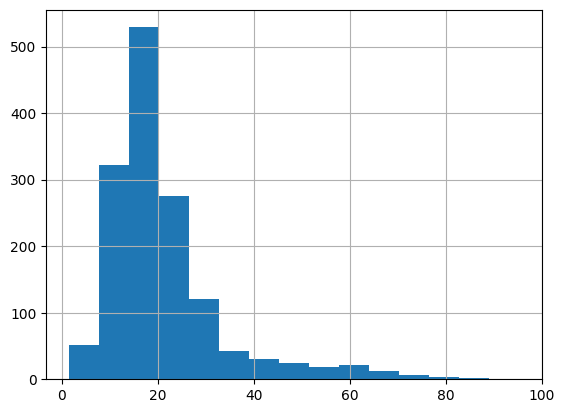

In [64]:
df['sqfootPrice'].hist(bins=15)

<AxesSubplot: xlabel='sqfootPrice', ylabel='OverallCond'>

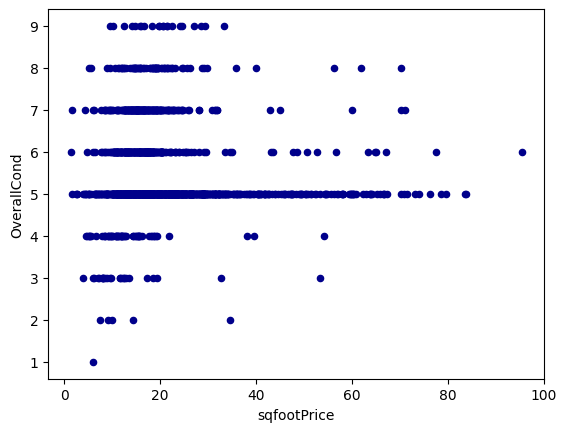

In [66]:
df.plot.scatter(x='sqfootPrice',
                      y='OverallCond',
                      c='DarkBlue')

<AxesSubplot: xlabel='sqfootPrice', ylabel='SalePrice'>

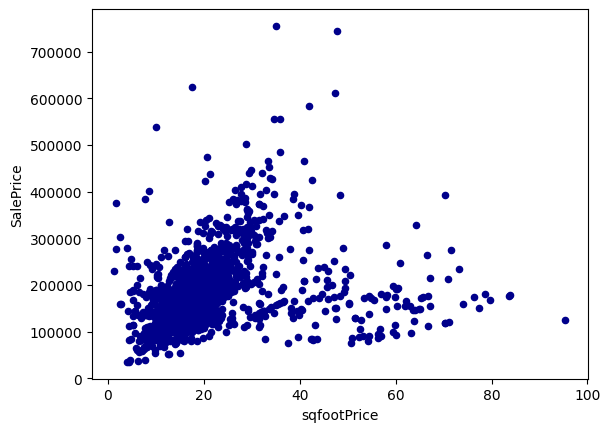

In [69]:
df.plot.scatter(x='sqfootPrice',
                      y='SalePrice',
                      c='DarkBlue')

In [72]:
grouped = df.groupby('Street')
grouped.first()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,sqfootPrice
Street,,,,,,,,,,,,,,,,,,,,,
Grvl,53,90,RM,110.0,8472,None,IR2,Bnk,AllPub,Corner,...,None,None,Shed,0,5,2010,WD,Normal,110000,12.983947
Pave,1,60,RL,65.0,8450,Grvl,Reg,Lvl,AllPub,Inside,...,Ex,MnPrv,Shed,0,2,2008,WD,Normal,208500,24.674556


In [73]:
grouped.get_group('Grvl')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,sqfootPrice
Id,,,,,,,,,,,,,,,,,,,,,
106,53,90,RM,110.0,8472,Grvl,NaN,IR2,Bnk,AllPub,...,NaN,NaN,NaN,0,5,2010,WD,Normal,110000,12.983947
672,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,NaN,NaN,Shed,700,8,2008,WD,Normal,228950,1.390441
1166,583,90,RL,81.0,11841,Grvl,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,118500,10.007601
1626,813,20,C (all),66.0,8712,Grvl,NaN,Reg,Bnk,AllPub,...,NaN,NaN,Shed,54,6,2010,WD,Alloca,55993,6.427112
2124,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000,4.500000
2370,1185,20,RL,50.0,35133,Grvl,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,186700,5.314092


In [75]:
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [25]:
df[['LotArea','Street']].groupby('Street').sum()

,LotArea
Street,
Grvl,246818
Pave,15107751


In [77]:
df.groupby('Street')['sqfootPrice'].agg([np.sum, np.mean, np.std])

,sum,mean,std
Street,,,
Grvl,40.623193,6.770532,4.133400
Pave,30721.399213,21.128885,12.376536


In [ ]:
df1.merge(df2, left_on='lkey', right_on='rkey')

In [ ]:
df1.merge(df2, how='inner', on='a')